In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from src.dataset import load_dataset
import altair as alt

In [2]:
df = load_dataset()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 49 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi

In [3]:
df_state = df[df['State'] == 'CA']

In [4]:
# Convert Start_Time and End_Time to datetypes
df_state['Start_Time'] = pd.to_datetime(df_state['Start_Time'], errors='coerce')
df_state['End_Time'] = pd.to_datetime(df_state['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
df_state['Year']=df_state['Start_Time'].dt.year
df_state['Month']=df_state['Start_Time'].dt.strftime('%b')
df_state['Day']=df_state['Start_Time'].dt.day
df_state['Hour']=df_state['Start_Time'].dt.hour
df_state['Weekday']=df_state['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df_state[td]=round((df_state['End_Time']-df_state['Start_Time'])/np.timedelta64(1,'m'))
df_state.info()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663204 entries, 728 to 2974334
Data columns (total 55 columns):
ID                       663204 non-null object
Source                   663204 non-null object
TMC                      449296 non-null float64
Severity                 663204 non-null int64
Start_Time               663204 non-null datetime64[ns]
End_Time                 663204 non-null datetime64[ns]
Start_Lat                663204 non-null float64
Start_Lng                663204 non-null float64
End_Lat                  213908 non-null float64
End_Lng                  213908 non-null float64
Distance(mi)             663204 non-null float64
Description              663204 non-null object
Number                   139891 non-null float64
Street                   663204 non-null object
Side                     663204 non-null object
City                     663198 non-null object
County                   663204 non-null object
State                    663204 non-null object


In [5]:
df_state[td][df_state[td]<=0]

69719      -0.0
69720      -0.0
69721      -0.0
69722      -1.0
69723      -1.0
628942     -0.0
628943    -30.0
1265261   -30.0
1265262   -31.0
2002111   -30.0
2002112   -31.0
2565705    -7.0
2565708    -7.0
Name: Time_Duration(min), dtype: float64

In [6]:
# Drop the rows with td<0

neg_outliers=df_state[td]<=0

# Set outliers to NAN
df_state[neg_outliers] = np.nan

# Drop rows with negative td
df_state.dropna(subset=[td],axis=0,inplace=True)
df_state.info()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663191 entries, 728 to 2974334
Data columns (total 55 columns):
ID                       663191 non-null object
Source                   663191 non-null object
TMC                      449285 non-null float64
Severity                 663191 non-null float64
Start_Time               663191 non-null datetime64[ns]
End_Time                 663191 non-null datetime64[ns]
Start_Lat                663191 non-null float64
Start_Lng                663191 non-null float64
End_Lat                  213906 non-null float64
End_Lng                  213906 non-null float64
Distance(mi)             663191 non-null float64
Description              663191 non-null object
Number                   139887 non-null float64
Street                   663191 non-null object
Side                     663191 non-null object
City                     663185 non-null object
County                   663191 non-null object
State                    663191 non-null objec

In [7]:
# Double check to make sure no more negative td
df_state[td][df_state[td]<=0]

Series([], Name: Time_Duration(min), dtype: float64)

# Remove Outliers

In [8]:
n=3

median = df_state[td].median()
std = df_state[td].std()
outliers = (df_state[td] - median).abs() > std*n

# Set outliers to NAN
df_state[outliers] = np.nan

# Fill NAN with median
df_state[td].fillna(median, inplace=True)
df_state.info()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 663191 entries, 728 to 2974334
Data columns (total 55 columns):
ID                       663138 non-null object
Source                   663138 non-null object
TMC                      449283 non-null float64
Severity                 663138 non-null float64
Start_Time               663138 non-null datetime64[ns]
End_Time                 663138 non-null datetime64[ns]
Start_Lat                663138 non-null float64
Start_Lng                663138 non-null float64
End_Lat                  213855 non-null float64
End_Lng                  213855 non-null float64
Distance(mi)             663138 non-null float64
Description              663138 non-null object
Number                   139862 non-null float64
Street                   663138 non-null object
Side                     663138 non-null object
City                     663132 non-null object
County                   663138 non-null object
State                    663138 non-null objec

In [10]:
feature_lst=['Source','TMC','Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','State','Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']

In [11]:
# Select the dataset to include only the selected features
df_state_sel=df_state[feature_lst].copy()
df_state_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663191 entries, 728 to 2974334
Data columns (total 34 columns):
Source                663138 non-null object
TMC                   449283 non-null float64
Severity              663138 non-null float64
Start_Lng             663138 non-null float64
Start_Lat             663138 non-null float64
Distance(mi)          663138 non-null float64
Side                  663138 non-null object
City                  663132 non-null object
County                663138 non-null object
State                 663138 non-null object
Timezone              662933 non-null object
Temperature(F)        648014 non-null float64
Humidity(%)           646825 non-null float64
Pressure(in)          651897 non-null float64
Visibility(mi)        649943 non-null float64
Wind_Direction        650991 non-null object
Weather_Condition     650258 non-null object
Amenity               663138 non-null float64
Bump                  663138 non-null float64
Crossing            

In [12]:
# Check missing values
df_state_sel.isnull().mean()

Source                0.000080
TMC                   0.322544
Severity              0.000080
Start_Lng             0.000080
Start_Lat             0.000080
Distance(mi)          0.000080
Side                  0.000080
City                  0.000089
County                0.000080
State                 0.000080
Timezone              0.000389
Temperature(F)        0.022885
Humidity(%)           0.024678
Pressure(in)          0.017030
Visibility(mi)        0.019976
Wind_Direction        0.018396
Weather_Condition     0.019501
Amenity               0.000080
Bump                  0.000080
Crossing              0.000080
Give_Way              0.000080
Junction              0.000080
No_Exit               0.000080
Railway               0.000080
Roundabout            0.000080
Station               0.000080
Stop                  0.000080
Traffic_Calming       0.000080
Traffic_Signal        0.000080
Turning_Loop          0.000080
Sunrise_Sunset        0.000089
Hour                  0.000080
Weekday 

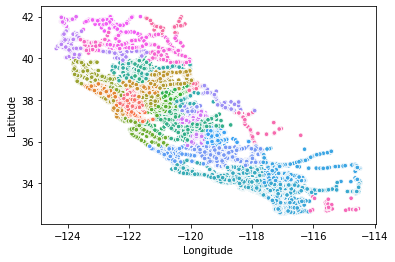

In [19]:
# Map of accidents, color code by county
import seaborn as sns

sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='County', legend=False, s=20)
# Set x-axis label
plt.xlabel('Longitude')
# Set y-axis label
plt.ylabel('Latitude')
plt.show()

In [21]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [ ]:
df_state = df # Generate dummies for categorical data
df_state_dummy = pd.get_dummies(df_state, drop_first=True)

df_state_dummy.info()

In [ ]:
# Assign the data
df=df_state_dummy

In [ ]:
# Set the target for the prediction
target='Severity'

# Create arrays for the features and the response variable

# set X and y
y = df[target]
X = df.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)